In [4]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import pylab as plot

a = '新特徵資料_noerror.csv'
data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
print(data[0:2,:])

[[ 1.00000000e+02  4.00833326e+00 -2.33000000e-01  1.17000000e+03
   8.00690000e+00  1.50000000e+03  8.75000000e+00]
 [ 1.00000000e+02  4.00833326e+00 -2.14000000e-01  1.23000000e+03
   7.99290000e+00  1.71000000e+03  8.67000000e+00]]


In [2]:
features_train, features_test, soh_train, soh_test = train_test_split(data[:,[1,2,3,4,5,6]], data[:,0:1].ravel(), test_size=0.2, random_state=100)
print("features_train\n", features_train)
print("soh_train\n", soh_train)     #檢查格式是否正確,才不會讓ML程式垮掉

features_train
 [[ 3.51902772e+00 -2.62000000e-01  7.28000000e+02  8.11000000e+00
   1.31000000e+03  8.76000000e+00]
 [ 2.33638891e+00 -3.26000000e-01  1.79000000e+02  8.77340000e+00
   7.01000000e+02  8.89000000e+00]
 [ 3.01347228e+00 -3.20000000e-01  6.82000000e+02  8.24990000e+00
   1.08000000e+03  8.88000000e+00]
 ...
 [ 3.99027782e+00 -2.10000000e-01  8.12000000e+02  8.07800000e+00
   1.50000000e+03  8.66000000e+00]
 [ 3.36375000e+00 -2.54000000e-01  7.42000000e+02  8.12910000e+00
   1.31000000e+03  8.74000000e+00]
 [ 3.20847228e+00 -2.49000000e-01  6.95000000e+02  8.17880000e+00
   1.05000000e+03  8.75000000e+00]]
soh_train
 [85.4 42.5 72.7 ... 96.  82.5 76.1]


In [16]:
import time
t1 = time.monotonic()
regr = MLPRegressor(hidden_layer_sizes=(100,20), learning_rate_init=0.003, random_state=1, max_iter=50000, n_iter_no_change=5000).fit(features_train, soh_train)
t2 = time.monotonic()
print("time elapsed: " + str(np.round(t2-t1,3)) + " seconds")

time elapsed: 3515.625 seconds


In [15]:
fnn_predt = regr.predict(features_test)
fnn_score = np.round(regr.score(features_test, soh_test),3)
MAE = np.round(mean_absolute_error(fnn_predt, soh_test),3)
RMSE = np.round(np.sqrt(mean_squared_error(fnn_predt, soh_test)),3)
print("fnn_predt = ", fnn_predt)
print("fnn_score = ", fnn_score)
print("  fnn_MAE = ", MAE)
print(" fnn_RMSE = ", RMSE)

fnn_predt =  [52.64634252 56.94505994 76.88449667 ... 41.13530582 89.50501011
 87.09686895]
fnn_score =  0.98
  fnn_MAE =  1.921
 fnn_RMSE =  2.565


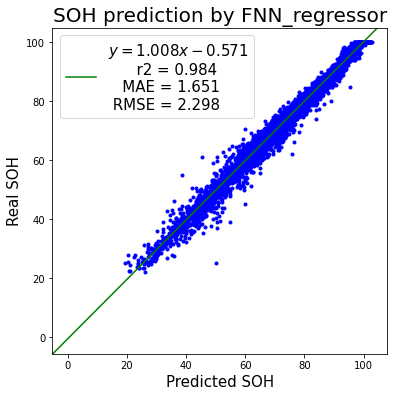

In [13]:
plt.figure(figsize=(6,6))
plt.plot(fnn_predt, soh_test, 'b.');     #
m1, b1 = np.polyfit(fnn_predt, soh_test, 1);
plt.axline(xy1=(0, b1), slope=m1, color='g', label=f'$y = {m1:.3f}x {b1:+.3f}$\n      r2 = {fnn_score}\n   MAE = {MAE}\n RMSE = {RMSE}') # 
# plt.xlim(25000, 35000)
# plt.ylim(0, 40000)
plt.xlabel("Predicted SOH", fontsize=15)
plt.ylabel("Real SOH", fontsize=15)
plt.title("SOH prediction by FNN_regressor", fontsize=20);
plt.legend(fontsize=15)
plt.show();  # plt.savefig("SOH prediction by FNN" + ".jpg"); save as jpg


In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(100,20), learning_rate_init=0.002, random_state=1, max_iter=50000, n_iter_no_change=5000).fit(features_train, soh_train)
time elapsed: 11133.938 seconds
fnn_score =  0.984
  fnn_MAE =  1.651
 fnn_RMSE =  2.298

regr = MLPRegressor(hidden_layer_sizes=(100,20), learning_rate_init=0.002, random_state=1, max_iter=50000, n_iter_no_change=2000).fit(features_train, soh_train)
time elapsed: 2205.047 seconds
fnn_predt =  [51.38016644 56.62475003 77.88386279 ... 39.24498067 89.02429725
 87.69195221]
fnn_score =  0.982
  fnn_MAE =  1.779
 fnn_RMSE =  2.433

regr = MLPRegressor(hidden_layer_sizes=(100,20), learning_rate_init=0.001, random_state=1, max_iter=50000, n_iter_no_change=2000).fit(features_train, soh_train)
time elapsed: 7644.906 seconds
fnn_predt =  [52.03504816 56.0871702  77.81569985 ... 39.5903737  89.52932671
 87.94908749]
fnn_score =  0.984
  fnn_MAE =  1.677
 fnn_RMSE =  2.331

regr = MLPRegressor(hidden_layer_sizes=(100,20), learning_rate_init=0.001, random_state=1, max_iter=20000, n_iter_no_change=2000).fit(features_train, soh_train)
time elapsed: 4635.0 seconds
fnn_score =  0.983
  fnn_MAE =  1.674
 fnn_RMSE =  2.405